# Hierarchical Data Structure

* [How netCDF files are organized](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/fundamentals-of-netcdf-data-storage.htm)
* [HDF files](https://docs.h5py.org/en/stable/quick.html)

In order to use the data in this notebook you will need to unzip the three files in this folder.

## Content

- Background
- HDF4 example
- HDF5 example
- netCDF example

# File Format Structure

## Concept No. 1: pros and cons of lenient file formats
<img src='./images/strict_file_format_spectrum.jpg' width=800>

|       | Pro | Con |
| :----------- | :-----------: | :-----------: |
| **Strict File Format**      | easy to know what you're going to get       | doesn't handle all data types       |
| **Not Strict File Format**   | handles lots of data types        | what's inside is unpredictable      |

## Concept No. 2: organizing variables by dimension

<img src="https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/GUID-D872A4C3-749E-4159-A6C0-FB6D3B47C5D8-web.gif">

<center>A 3-dimensional dataset</center>

<img src="https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/GUID-1D7240CD-54D4-45FF-A150-43B1AFFBF7D6-web.gif">

<center>A 4-dimensional dataset</center>

Images from [Fundamentals of NetCDF Storage](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/fundamentals-of-netcdf-data-storage.htm) by ESRI

When variables are defined in netCDF files they are also assigned dimensions.  **Dimensions** tell us the axis over which our data varies.  Common examples are latitute, longitude, or time.  The values of the dimensions are given in special variables called **coordinate variables**.  The coordinate variables and dimensions help us understand what the core data stored in each variable is describing.  **Attributes** store metadata about our variables.

## Concept No. 3: groups and datasets

In the previous raster lessons we have been using data where the organization is a single dataset per file.  HDF and netCDF are unique in that they allow multiple datasets to be in the same file.  To keep organized, datasets are allowed to be stored together in **groups**.  An analogy is to think of groups like folders in a folder structure and datasets as the individual files.  Groups can have more groups inside of them.

# HDF4

#### Install

In Anaconda Powershell:

`conda install -c conda-forge -n lessons pyhdf`

#### Documentation

http://fhs.github.io/pyhdf/modules/SD.html  (My opinion: pretty terrible docs)

#### Example dataset: CALIPSO

CALIPSO Level 2: `CAL_LID_L2_01kmCLay-Standard-V4-21.2020-07-01T07-32-43ZD.hdf`

[download link](https://drive.google.com/file/d/1AMNZn8u4TGYefZjuo9UjmSXox1LcGdSE/view?usp=sharing)

### Opening the Dataset

In [52]:
from pyhdf.SD import *

In [53]:
filepath = './CAL_LID_L2_01kmCLay-Standard-V4-21.2020-07-01T07-32-43ZD.hdf'

In [54]:
# Opening the file
d = SD(filepath)

In [55]:
d

### Exploring the dataset

In [56]:
d.datasets()

{'Profile_ID': (('fakeDim0', 'fakeDim1'), (17120, 1), 24, 0),
 'Latitude': (('fakeDim2', 'fakeDim3'), (17120, 1), 5, 1),
 'Longitude': (('fakeDim4', 'fakeDim5'), (17120, 1), 5, 2),
 'Profile_Time': (('fakeDim6', 'fakeDim7'), (17120, 1), 6, 3),
 'Profile_UTC_Time': (('fakeDim8', 'fakeDim9'), (17120, 1), 6, 4),
 'Day_Night_Flag': (('fakeDim10', 'fakeDim11'), (17120, 1), 20, 5),
 'Off_Nadir_Angle': (('fakeDim12', 'fakeDim13'), (17120, 1), 5, 6),
 'Solar_Zenith_Angle': (('fakeDim14', 'fakeDim15'), (17120, 1), 5, 7),
 'Solar_Azimuth_Angle': (('fakeDim16', 'fakeDim17'), (17120, 1), 5, 8),
 'Scattering_Angle': (('fakeDim18', 'fakeDim19'), (17120, 1), 5, 9),
 'Spacecraft_Position': (('fakeDim20', 'fakeDim21'), (17120, 3), 6, 10),
 'Parallel_Column_Reflectance_532': (('fakeDim22', 'fakeDim23'),
  (17120, 1),
  5,
  11),
 'Parallel_Column_Reflectance_Uncertainty_532': (('fakeDim24', 'fakeDim25'),
  (17120, 1),
  5,
  12),
 'Perpendicular_Column_Reflectance_532': (('fakeDim26', 'fakeDim27'),
  (1

Choose a key from the `.datasets()` dictionary and get the varaible info using `.select()`

In [57]:
d.select('Integrated_Attenuated_Backscatter_532')

### Getting your data

The data can be accessed using `[:]` and is output as a numpy array.  Any of the methods we practiced with numpy arrays in lecture can be used on the dataset.

In [58]:
d.select('Integrated_Attenuated_Backscatter_532')[:]

array([[-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
        -9.999000e+03, -9.999000e+03],
       [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
        -9.999000e+03, -9.999000e+03],
       [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
        -9.999000e+03, -9.999000e+03],
       ...,
       [ 7.146672e-02, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
        -9.999000e+03, -9.999000e+03],
       [ 7.079382e-02, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
        -9.999000e+03, -9.999000e+03],
       [ 6.545279e-02, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
        -9.999000e+03, -9.999000e+03]], dtype=float32)

In [59]:
backscatter = d.select('Integrated_Attenuated_Backscatter_532')[:]

In [60]:
type(backscatter)

numpy.ndarray

In [61]:
backscatter.shape

(17120, 10)

In [62]:
backscatter.max()

0.1473684

### Attributes

Get metadata with the `.attributes()` method.

In [63]:
d.select('Integrated_Attenuated_Backscatter_532').attributes()

{'units': 'per steradian',
 'format': 'Float_32',
 'valid_range': '0.0...1.8',
 'fillvalue': -9999.0}

### Masking a no data value

While HDF5 data will automatically mask out nodata values, HDF4 datasets often don't.  To mask them yourself you can look up the fill value and apply it to the array.

In [64]:
import numpy.ma as ma

In [65]:
# Mask the array
masked_backscatter = ma.masked_where(backscatter == -9999, backscatter)
# Update the nodata value
ma.set_fill_value(backscatter, -9999)

In [66]:
masked_backscatter

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [0.014419915154576302, --, --, --, --, --, --, --, --, --],
        [0.0465192012488842, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [0.020508071407675743, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [0.0035129841417074203, --, --, --, --, --, --, --, --, --],
        [0.018650395795702934, --, --, --, --, --, --, --, --, --],
        [0.007342418190091848, --, --, --, --, --, --, --, --, --],
        [0.037423163652420044, --, --, --, --, --, --, --, --, --],
        [0.02184727042913437, --, --, --, --, --, --, --, --, --],
        [0.02546164207160473, --, --, --, --

# HDF5

#### Install

In Anaconda Powershell:

`conda install -c conda-forge -n lessons h5py`

#### Documentation

https://docs.h5py.org/en/stable/quick.html

#### Example Dataset: ASTER Emissivity

`AG100.v003.83.-013.0001.h5`

### Opening a Dataset

In [67]:
import h5py

In [68]:
filepath = './AG100.v003.83.-013.0001.h5'

In [69]:
f = h5py.File(filepath, 'r')

In [70]:
f

<HDF5 file "AG100.v003.83.-013.0001.h5" (mode r)>

### Exploring Groups

In [71]:
f.keys()

<KeysViewHDF5 ['ASTER GDEM', 'Emissivity', 'Geolocation', 'Land Water Map', 'NDVI', 'Observations', 'Temperature']>

In [72]:
f['Emissivity']

<HDF5 group "/Emissivity" (2 members)>

In [73]:
f['Emissivity'].keys()

<KeysViewHDF5 ['Mean', 'SDev']>

In [74]:
f['Emissivity']['Mean']

<HDF5 dataset "Mean": shape (5, 1000, 1000), type "<i2">

You can check where you are in the file hierarchy with the `.name` method

In [75]:
f.name

'/'

In [76]:
f['Emissivity'].name

'/Emissivity'

In [77]:
f['Emissivity']['Mean'].name

'/Emissivity/Mean'

### Getting your data

The data inside the data group dictionaries are numpy arrays, so you can use any of the methods we learned about in other lectures with them.

In [78]:
mean_emissivity = f['Emissivity']['Mean'][:]

In [79]:
type(mean_emissivity)

numpy.ndarray

In [80]:
mean_emissivity.shape

(5, 1000, 1000)

In [81]:
mean_emissivity.max()

991

In [82]:
from matplotlib import pyplot

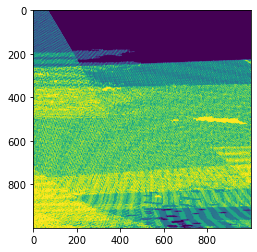

In [83]:
pyplot.imshow(mean_emissivity[0])

### Attributes

Metadata in HDF files are called **attributes** and are accessed with `.attrs`

In [84]:
f['Emissivity']['Mean'].attrs.keys()

<KeysViewHDF5 ['Description']>

In [85]:
f['Emissivity']['Mean'].attrs['Description']

array([b'Mean Emissivity for each pixel on grid-box using all ASTER data from 2000-2010'],
      dtype='|S79')

If there are no attributes for that group you will just get back an empty list

In [86]:
# No attributes on the Emissivity group
f['Emissivity'].attrs.keys()

<KeysViewHDF5 []>

In [87]:
# No attributes on the root group
f.attrs.keys()

<KeysViewHDF5 []>

# netCDF

#### Install

In Anaconda Powershell:

`conda install -c conda-forge -n lessons netcdf4`

#### Documentation Link

https://unidata.github.io/netcdf4-python/#creatingopeningclosing-a-netcdf-file

#### Example Dataset: MODIS Chlorophyll-a

`A2018006.L3m_DAY_CHL_chlor_a_4km.nc`

### Opening a Dataset

In [88]:
from netCDF4 import Dataset

In [89]:
filepath = './A2018006.L3m_DAY_CHL_chlor_a_4km.nc'

In [90]:
d = Dataset(filepath, 'r')

Looking at the `Dataset` object gives us a decent overview of our dataset.  We can see metadata applies to the whole dataset. At the very bottom the **dimensions** and **varaiables** are shown, as well as any additional groups.

In [91]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: A2018006.L3m_DAY_CHL_chlor_a_4km.nc
    instrument: MODIS
    title: MODISA Level-3 Standard Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    temporal_range: day
    processing_version: 2018.0
    date_created: 2018-03-19T18:42:34.000Z
    history: l3mapgen par=A2018006.L3m_DAY_CHL_chlor_a_4km.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2018-01-06T00:15:01.000Z
    time_coverage_end: 2018-01-07T02:30:00.000Z
    start_orbit_number: 83382
    end_orbit_number: 83397
    map_projection: Equidistant Cylindrical
    latitude_units: degrees_north
    longitude_units: degrees_east
    northernmost_latitude: 90.0
    southernmost_latitude: -90.0
    westernmost_longitude: -180.0
    easternmost_longi

You can also directly access dimensions or varaiables.  The outputs act like dictionaries, so you can use `.keys()` or `[KEY]` syntax to access elements

In [92]:
d.dimensions

{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 4320,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 8640,
 'rgb': <class 'netCDF4._netCDF4.Dimension'>: name = 'rgb', size = 3,
 'eightbitcolor': <class 'netCDF4._netCDF4.Dimension'>: name = 'eightbitcolor', size = 256}

In [93]:
d.variables

{'chlor_a': <class 'netCDF4._netCDF4.Variable'>
 float32 chlor_a(lat, lon)
     long_name: Chlorophyll Concentration, OCI Algorithm
     units: mg m^-3
     standard_name: mass_concentration_chlorophyll_concentration_in_sea_water
     _FillValue: -32767.0
     valid_min: 0.001
     valid_max: 100.0
     reference: Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
     display_scale: log
     display_min: 0.01
     display_max: 20.0
 unlimited dimensions: 
 current shape = (4320, 8640)
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: Latitude
     units: degrees_north
     standard_name: latitude
     _FillValue: -999.0
     valid_min: -90.0
     valid_max: 90.0
 unlimited dimensions: 
 current shape = (4320,)
 filling on,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     l

In [94]:
# Treating a variable like a dictionary
print(d.variables.keys())
d.variables['chlor_a']

dict_keys(['chlor_a', 'lat', 'lon', 'palette'])


<class 'netCDF4._netCDF4.Variable'>
float32 chlor_a(lat, lon)
    long_name: Chlorophyll Concentration, OCI Algorithm
    units: mg m^-3
    standard_name: mass_concentration_chlorophyll_concentration_in_sea_water
    _FillValue: -32767.0
    valid_min: 0.001
    valid_max: 100.0
    reference: Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
    display_scale: log
    display_min: 0.01
    display_max: 20.0
unlimited dimensions: 
current shape = (4320, 8640)
filling on

In [95]:
# Access metadata with using a period .
d.variables['chlor_a'].long_name

'Chlorophyll Concentration, OCI Algorithm'

If the data you need is in a group, it can be accessed with `.groups`

In [96]:
d.groups['processing_control']

<class 'netCDF4._netCDF4.Group'>
group /processing_control:
    software_name: l3mapgen
    software_version: 2.0.0-V2018.0.6
    source: A2018006.L3b_DAY_CHL.nc
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    dimensions(sizes): 
    variables(dimensions): 
    groups: input_parameters

### Getting your data

Once you traverse the file structure with the right keys and find a `netCDF4._netCDF4.Variable` object you can accesss pull out the numpy array and work with it.

In [97]:
chlor_a = d.variables['chlor_a'][:]

In [98]:
type(chlor_a)

numpy.ma.core.MaskedArray

In [99]:
chlor_a.shape

(4320, 8640)

In [100]:
chlor_a.max()

98.49251

In [101]:
from matplotlib import pyplot

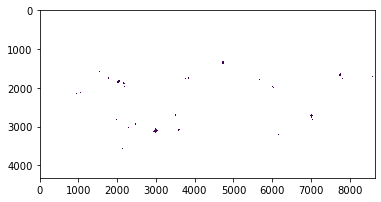

In [102]:
pyplot.imshow(chlor_a)